In [1]:
from google.colab import files
uploaded = files.upload()

Saving Shopping Mall Customer Segmentation Data .csv to Shopping Mall Customer Segmentation Data .csv


In [3]:
import pandas as pd
df=pd.read_csv("Shopping Mall Customer Segmentation Data .csv")
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [4]:
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')


First 5 rows of the dataset:
                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  

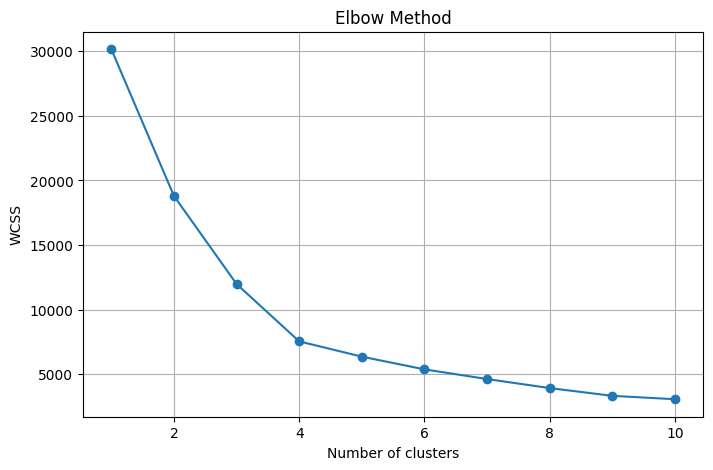

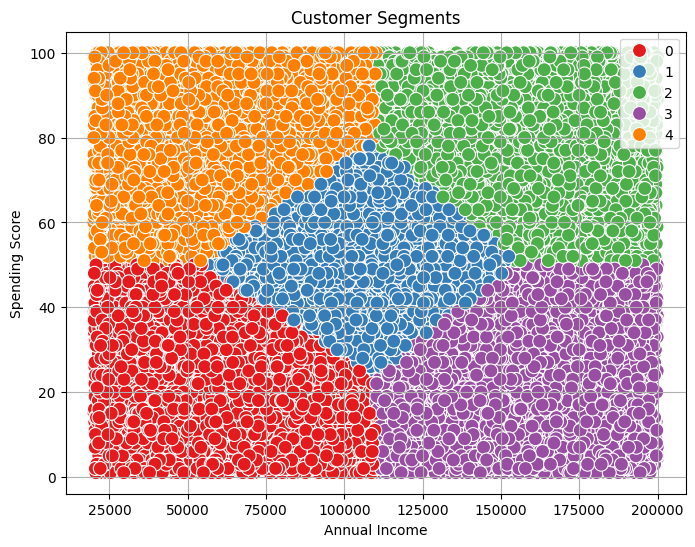

In [20]:
# 📌 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 📌 Step 2: Load the dataset
df = pd.read_csv("Shopping Mall Customer Segmentation Data .csv")

# 📌 Step 3: Basic EDA
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nChecking for null values:")
print(df.isnull().sum())

# 📌 Step 4: Select features for clustering
X = df[['Annual Income', 'Spending Score']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 📊 Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# 📌 Step 7: Apply KMeans with optimal k
k = 5  # Assume elbow found 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# 📌 Step 8: Add cluster labels to dataframe
df['Cluster'] = y_kmeans

# 📊 Step 9: Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'],
                hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()